# Introduction to deep learning for computer vision

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Copying images to training, validation, and test directories**

In [27]:
!pip install gdown
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata


Downloading...
From (uriginal): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
From (redirected): https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd&confirm=t&uuid=2e316609-ada8-4742-bc56-54f16a431139
To: /Users/yuseonchoi/Workspace/dogs-vs-cats.zip
100%|████████████████████████████████████████| 852M/852M [00:49<00:00, 17.1MB/s]


'dogs-vs-cats.zip'

In [35]:
!pwd

/Users/yuseonchoi/Workspace


In [36]:
!ls

HW04_20231186_YuseonChoi.ipynb   dogs-vs-cats
advanced-deep-learning-2023-fall


In [46]:
%cd dogs-vs-cats

/Users/yuseonchoi/Workspace/dogs-vs-cats


In [50]:
!ls

sampleSubmission.csv test1                train


In [51]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [52]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Metal device set to: Apple M1 Pro


2023-09-30 13:50:10.178151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-30 13:50:10.178523: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [54]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [55]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [56]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [57]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [58]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [59]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [60]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


2023-09-30 13:50:32.628426: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [61]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [62]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2023-09-30 13:50:34.975145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7250 - accuracy: 0.5055

2023-09-30 13:50:41.679189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 8s 84ms/step - loss: 0.7250 - accuracy: 0.5055 - val_loss: 0.6914 - val_accuracy: 0.5320
Epoch 2/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6956 - accuracy: 0.5070 - val_loss: 0.6819 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 5s 78ms/step - loss: 0.7044 - accuracy: 0.5830 - val_loss: 0.6444 - val_accuracy: 0.6290
Epoch 4/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6518 - accuracy: 0.6295 - val_loss: 0.6593 - val_accuracy: 0.6040
Epoch 5/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6145 - accuracy: 0.6730 - val_loss: 0.7068 - val_accuracy: 0.6390
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5831 - accuracy: 0.7040 - val_loss: 0.6682 - val_accuracy: 0.6480
Epoch 7/30
63/63 [==============================] - 5s 77ms/step - loss: 0.5486 - accuracy: 0.7345 - val_loss: 0.9145 - val_accuracy: 0.6150
Epoch 8/30
63/63 [======

**Displaying curves of loss and accuracy during training**

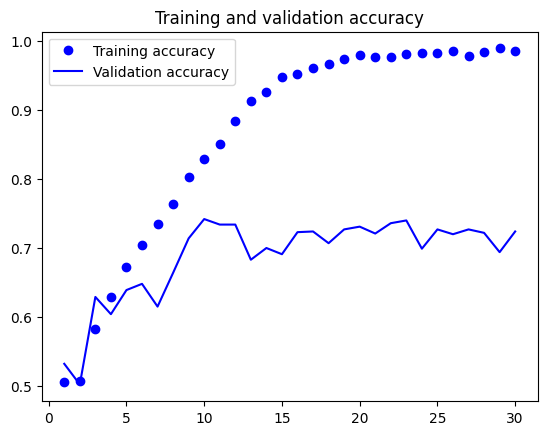

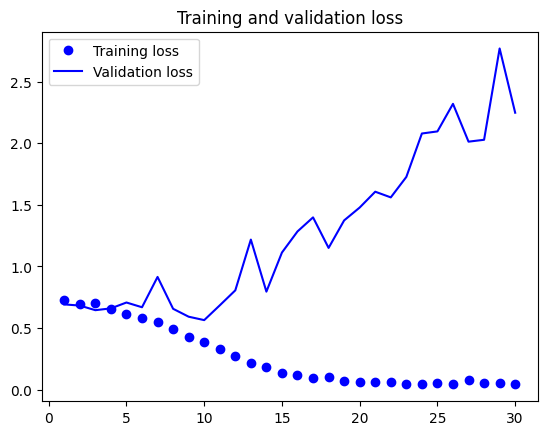

In [63]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [64]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 3/63 [>.............................] - ETA: 1s - loss: 0.7068 - accuracy: 0.7500

2023-09-30 13:53:05.329350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 22ms/step - loss: 0.5985 - accuracy: 0.7455
Test accuracy: 0.746


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [82]:
with tf.device('/cpu:0'):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
        ]
    )

**Displaying some randomly augmented training images**

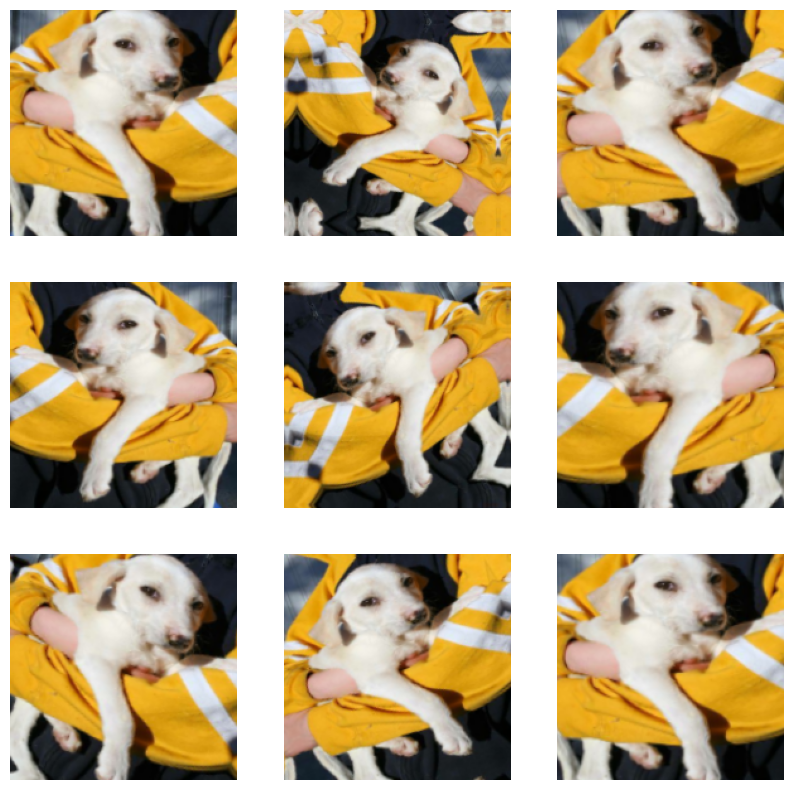

In [83]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [84]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [85]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100


2023-10-01 02:44:52.483729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.7182 - accuracy: 0.5100

2023-10-01 02:45:02.527698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 11s 164ms/step - loss: 0.7182 - accuracy: 0.5100 - val_loss: 0.6915 - val_accuracy: 0.5070
Epoch 2/100
63/63 [==============================] - 10s 162ms/step - loss: 0.7005 - accuracy: 0.5200 - val_loss: 0.7447 - val_accuracy: 0.5180
Epoch 3/100
63/63 [==============================] - 10s 162ms/step - loss: 0.7167 - accuracy: 0.5750 - val_loss: 0.6733 - val_accuracy: 0.6250
Epoch 4/100
63/63 [==============================] - 10s 159ms/step - loss: 0.6729 - accuracy: 0.6035 - val_loss: 0.6770 - val_accuracy: 0.5330
Epoch 5/100
63/63 [==============================] - 10s 160ms/step - loss: 0.6659 - accuracy: 0.6060 - val_loss: 0.6672 - val_accuracy: 0.5720
Epoch 6/100
63/63 [==============================] - 10s 159ms/step - loss: 0.6714 - accuracy: 0.6535 - val_loss: 0.6186 - val_accuracy: 0.6520
Epoch 7/100
63/63 [==============================] - 10s 157ms/step - loss: 0.6277 - accuracy: 0.6480 - val_loss: 0.7246 - val_accuracy: 0.5790
Epoc

**Evaluating the model on the test set**

In [86]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 3/63 [>.............................] - ETA: 1s - loss: 0.8271 - accuracy: 0.8021

2023-10-01 03:02:10.138863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 22ms/step - loss: 0.5193 - accuracy: 0.8535
Test accuracy: 0.854


### Additional Experiment

#### 1. Add various augmentation methods

In [129]:
with tf.device('/cpu:0'):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.1),
            layers.RandomBrightness(0.1)
        ]
    )

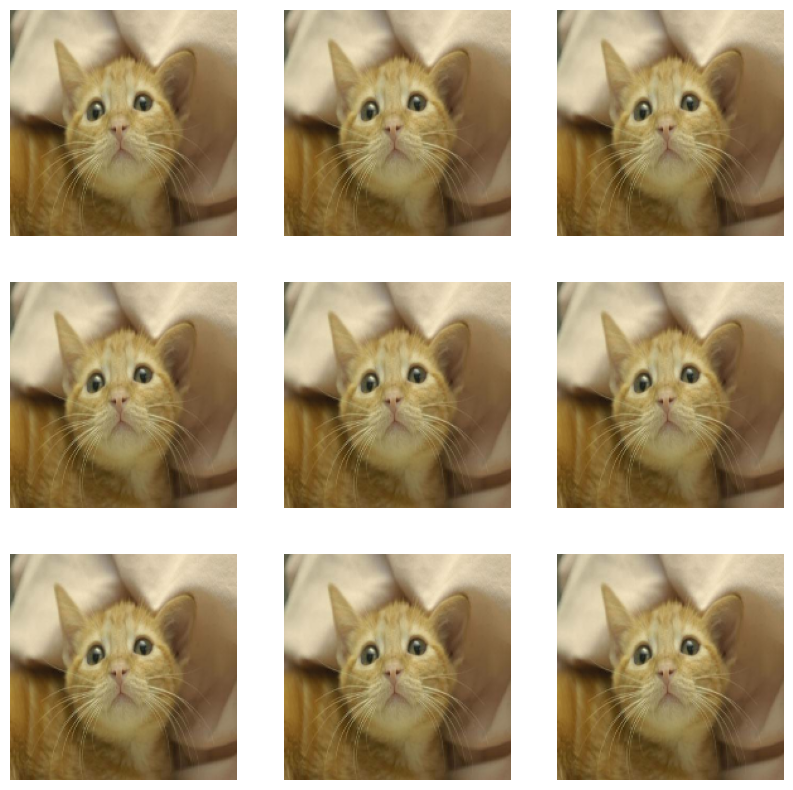

In [153]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [154]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [156]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5200

2023-10-01 03:12:56.554866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 28s 449ms/step - loss: 0.6919 - accuracy: 0.5200 - val_loss: 0.6857 - val_accuracy: 0.5120
Epoch 2/100
63/63 [==============================] - 27s 433ms/step - loss: 0.6771 - accuracy: 0.5760 - val_loss: 0.6839 - val_accuracy: 0.5440
Epoch 3/100
63/63 [==============================] - 29s 460ms/step - loss: 0.6706 - accuracy: 0.5670 - val_loss: 0.6863 - val_accuracy: 0.5160
Epoch 4/100
63/63 [==============================] - 31s 495ms/step - loss: 0.6772 - accuracy: 0.5665 - val_loss: 0.6739 - val_accuracy: 0.6060
Epoch 5/100
63/63 [==============================] - 29s 456ms/step - loss: 0.6807 - accuracy: 0.5650 - val_loss: 0.6670 - val_accuracy: 0.5470
Epoch 6/100
63/63 [==============================] - 28s 447ms/step - loss: 0.6601 - accuracy: 0.5850 - val_loss: 0.6434 - val_accuracy: 0.6110
Epoch 7/100
63/63 [==============================] - 29s 454ms/step - loss: 0.6383 - accuracy: 0.6210 - val_loss: 0.6242 - val_accuracy: 0.6460
Epoc

In [157]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

 1/63 [..............................] - ETA: 11s - loss: 0.6414 - accuracy: 0.7188

2023-10-01 04:02:19.596637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 21ms/step - loss: 0.4431 - accuracy: 0.8450
Test accuracy: 0.845


#### 2. Feature extraction with a pretrained model

Instantiate the VGG16 convolutional base

In [158]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [159]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Extract the VGG16 features and corresponding labels

In [160]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

2023-10-01 04:02:24.942362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 99ms/step


2023-10-01 04:02:37.392799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


In [161]:
train_features.shape

(2000, 5, 5, 512)

In [162]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20


2023-10-01 04:02:55.666054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 22.1110 - accuracy: 0.9205

2023-10-01 04:02:56.572199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 16ms/step - loss: 22.1110 - accuracy: 0.9205 - val_loss: 3.2971 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 4.2475 - accuracy: 0.9695 - val_loss: 3.4438 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 1s 11ms/step - loss: 2.9517 - accuracy: 0.9770 - val_loss: 5.1426 - val_accuracy: 0.9670
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3732 - accuracy: 0.9885 - val_loss: 3.8062 - val_accuracy: 0.9780
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 0.3478 - accuracy: 0.9950 - val_loss: 3.5357 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.4638 - accuracy: 0.9965 - val_loss: 5.5945 - val_accuracy: 0.9730
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.5932 - accuracy: 0.9940 - val_loss: 4.3529 - val_accuracy: 0.9770
Epoch 8/20
63/63 [=====

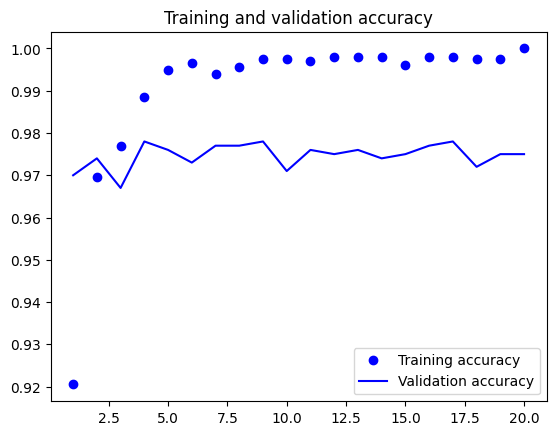

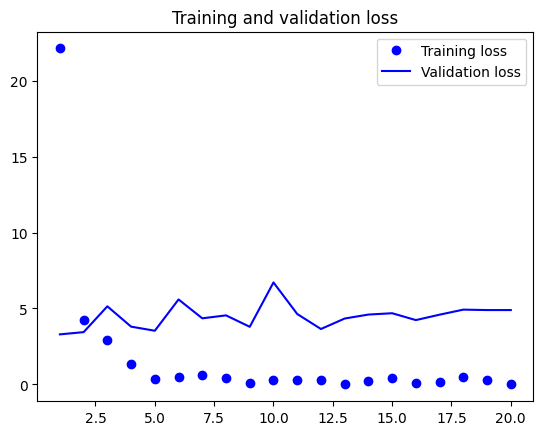

In [163]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Instantiate and freeze the VGG16 convolutional base

In [165]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [166]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [167]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Add a data augmentation stage and a classifier to the convolutional base

In [170]:
with tf.device('/cpu:0'):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
            layers.RandomContrast(0.1),
            layers.RandomBrightness(0.1)
        ]
    )

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [171]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/50


2023-10-01 04:03:41.820998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 16.3615 - accuracy: 0.9070

2023-10-01 04:04:17.501897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 42s 645ms/step - loss: 16.3615 - accuracy: 0.9070 - val_loss: 3.2148 - val_accuracy: 0.9710
Epoch 2/50
63/63 [==============================] - 40s 636ms/step - loss: 9.0403 - accuracy: 0.9360 - val_loss: 2.6307 - val_accuracy: 0.9790
Epoch 3/50
63/63 [==============================] - 40s 637ms/step - loss: 5.7691 - accuracy: 0.9495 - val_loss: 2.2766 - val_accuracy: 0.9790
Epoch 4/50
63/63 [==============================] - 40s 638ms/step - loss: 4.6392 - accuracy: 0.9560 - val_loss: 2.6430 - val_accuracy: 0.9770
Epoch 5/50
63/63 [==============================] - 40s 631ms/step - loss: 3.9249 - accuracy: 0.9605 - val_loss: 6.7301 - val_accuracy: 0.9630
Epoch 6/50
63/63 [==============================] - 40s 637ms/step - loss: 2.7602 - accuracy: 0.9730 - val_loss: 6.5160 - val_accuracy: 0.9630
Epoch 7/50
63/63 [==============================] - 40s 635ms/step - loss: 2.5801 - accuracy: 0.9680 - val_loss: 2.8128 - val_accuracy: 0.9740
Epoch 8/5

In [172]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2023-10-01 10:46:59.836160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 19s 297ms/step - loss: 0.9167 - accuracy: 0.9770
Test accuracy: 0.977


#### 3. Fine-tuning a pretrained model

In [173]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Freeze all layers until the fourth from the last

In [174]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Fine-tuning the model

In [175]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2023-10-01 10:47:19.379308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.2822 - accuracy: 0.9880

2023-10-01 10:48:06.909911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 59s 914ms/step - loss: 0.2822 - accuracy: 0.9880 - val_loss: 0.9657 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 63s 1s/step - loss: 0.2120 - accuracy: 0.9920 - val_loss: 0.7356 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 69s 1s/step - loss: 0.1823 - accuracy: 0.9920 - val_loss: 0.7793 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 70s 1s/step - loss: 0.1257 - accuracy: 0.9935 - val_loss: 0.7934 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 73s 1s/step - loss: 0.3153 - accuracy: 0.9905 - val_loss: 0.5598 - val_accuracy: 0.9840
Epoch 6/30
63/63 [==============================] - 75s 1s/step - loss: 0.0604 - accuracy: 0.9960 - val_loss: 0.6692 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 76s 1s/step - loss: 0.1648 - accuracy: 0.9935 - val_loss: 0.5876 - val_accuracy: 0.9800
Epoch 8/30
63/63 [==========

In [176]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2023-10-01 11:13:48.287835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 11s 169ms/step - loss: 1.0299 - accuracy: 0.9750
Test accuracy: 0.975
